# Importing dataset

In [95]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [96]:
dataset = pd.read_csv(r"Churn_Modelling.csv")

X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[: ,-1].values

In [97]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [98]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [99]:
from sklearn.preprocessing import LabelEncoder
li = LabelEncoder()
X[:,2] = li.fit_transform(X[:,2])
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [100]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [101]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

# Splitting Dataset

In [102]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train ,y_test = train_test_split(X,y ,test_size= 0.2,random_state=0)


In [103]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [104]:
x_train

array([[-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
        -1.03227043,  0.32472465]])

# Modeling

In [105]:
ann = tf.keras.models.Sequential()

In [106]:
ann.add(tf.keras.layers.Dense(units=16 , activation='relu'))

In [107]:
ann.add(tf.keras.layers.Dense(units=16 , activation='relu'))

In [108]:
ann.add(tf.keras.layers.Dense(units=1 , activation='sigmoid'))

In [109]:
ann.compile(optimizer='adam' ,loss='binary_crossentropy' ,metrics=['accuracy'])
history =ann.fit(x_train , y_train , batch_size=32 , epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.6169 - accuracy: 0.6636 - val_loss: 0.4983 - val_accuracy: 0.7969
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.7958 - val_loss: 0.4549 - val_accuracy: 0.7944
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4399 - accuracy: 0.7984 - val_loss: 0.4385 - val_accuracy: 0.8000
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.8098 - val_loss: 0.4246 - val_accuracy: 0.8131
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8311 - val_loss: 0.4079 - val_accuracy: 0.8238
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3783 - accuracy: 0.8445 - val_loss: 0.3903 - val_accuracy: 0.8306
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3624 - accuracy: 0.8519 - val_loss: 0.3806 - val_accuracy: 0.8350

Epoch 58/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 0.8673 - val_loss: 0.3616 - val_accuracy: 0.8537
Epoch 59/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3123 - accuracy: 0.8684 - val_loss: 0.3607 - val_accuracy: 0.8544
Epoch 60/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8680 - val_loss: 0.3609 - val_accuracy: 0.8506
Epoch 61/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3120 - accuracy: 0.8669 - val_loss: 0.3632 - val_accuracy: 0.8562
Epoch 62/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3124 - accuracy: 0.8719 - val_loss: 0.3614 - val_accuracy: 0.8506
Epoch 63/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8684 - val_loss: 0.3625 - val_accuracy: 0.8519
Epoch 64/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.8666 - val_loss: 0.3624 - val_accuracy:

# Single Prediction

In [110]:
print(ann.predict(sc.transform([[1 ,0 ,0 ,600 ,1 ,40 ,3 ,60000 ,2 ,1 ,1 ,50000]]))>0.5)

1/1 [==============================] - 0s 39ms/step
[[False]]


In [111]:
print(x_train.shape)

(8000, 12)


In [112]:
print(X [1,:])

[0.0 0.0 1.0 608 0 41 1 83807.86 1 0 1 112542.58]


In [113]:
y_pred = ann.predict(x_test)
y_pred = (y_pred >0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 595us/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


# Test Results

In [114]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test)*100)

[[1516  201]
 [  79  204]]
86.0


In [115]:
import matplotlib.pyplot as plt

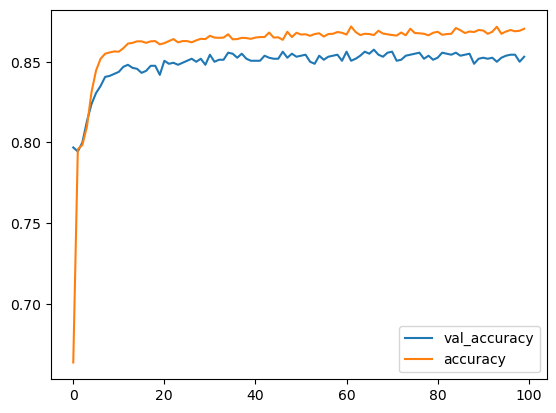

In [116]:
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.legend()
plt.show()


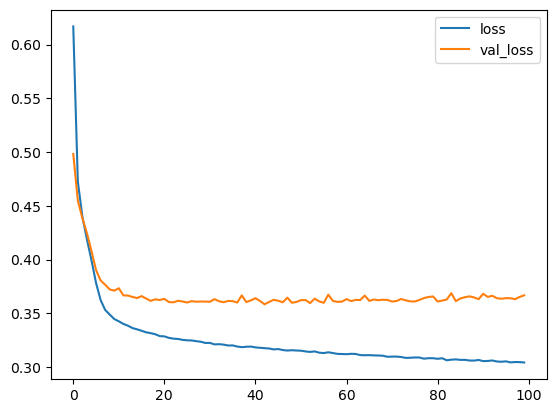

In [117]:
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()
